In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns


In [2]:
with open('movie_data.txt') as json_file:
    data = json.load(json_file)

In [3]:
data['1998']['Deep Impact']

{'Title': 'Deep Impact',
 'Year': '1998',
 'Rated': 'PG-13',
 'Released': '08 May 1998',
 'Runtime': '120 min',
 'Genre': 'Action, Drama, Sci-Fi',
 'Director': 'Mimi Leder',
 'Writer': 'Bruce Joel Rubin, Michael Tolkin',
 'Actors': 'Robert Duvall, Téa Leoni, Elijah Wood',
 'Plot': 'A comet is discovered to be on a collision course with Earth. As doomsday nears, the human race prepares for the worst.',
 'Language': 'English, Russian',
 'Country': 'United States',
 'Awards': '5 wins & 14 nominations',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BYTUwMTY1YmMtN2U5NC00YjkzLTg0YWQtZmEwNTEzZjdkNzQ2XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '6.2/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '45%'},
  {'Source': 'Metacritic', 'Value': '40/100'}],
 'Metascore': '40',
 'imdbRating': '6.2',
 'imdbVotes': '168,136',
 'imdbID': 'tt0120647',
 'Type': 'movie',
 'DVD': '01 Aug 2013',
 'BoxOffice': 140464664,
 'Production': 'Paramount

In [4]:
run_times = []
boxes = []
meta_score = []
imdb_score = []
mpaa_rating = []
movie_title = []
released = []
years = []

for year in list(data.keys()):
    movies = list(data[year].keys())
    for movie in movies:
        try:
            run = data[year][movie]['Runtime'][0:-4]
            box = data[year][movie]['BoxOffice']
            meta = data[year][movie]['Metascore']
            imdb = data[year][movie]['imdbRating']
            mpaa = data[year][movie]['Rated']
            mov = data[year][movie]['Title']
            rel = data[year][movie]['Released'][3:6]
            ye = data[year][movie]['Year']
            boxes.append(box)
            run_times.append(run)
            meta_score.append(meta)
            imdb_score.append(imdb)
            mpaa_rating.append(mpaa)
            movie_title.append(mov)
            released.append(rel)
            years.append(ye)
                
        except Exception as e:
            print(str(e)+" Year: "+year+" Movie: "+movie)
        


r_box = {'Title': movie_title,
    'Box Office': boxes,
        'Runtime': run_times, 
        'Metascore': meta_score, 
         'IMDB Score': imdb_score,
        'MPAA Rating': mpaa_rating, 
         'Month Released': released,
         'Year Released': years
        }

r_df = pd.DataFrame(r_box)
r_df

,Title,Box Office,Runtime,Metascore,IMDB Score,MPAA Rating,Month Released,Year Released
0,Star Wars: Episode V - The Empire Strikes Back,292753960,124,82,8.7,PG,Jun,1980
1,Stir Crazy,101300000,111,56,6.8,R,Dec,1980
2,Any Which Way You Can,70687344,116,51,6.1,PG,Dec,1980
3,Private Benjamin,69847348,109,59,6.2,R,Oct,1980
4,Coal Miner's Daughter,67182787,124,87,7.5,PG,Mar,1980
...,...,...,...,...,...,...,...,...
1748,Let Him Go,9358025,113,63,6.7,R,Nov,2020
1749,Freaky,9030855,102,67,6.3,R,Nov,2020
1750,Downhill,8287061,86,49,4.9,R,Feb,2020
1751,The Hunt,5812500,90,50,6.5,R,Mar,2020


In [5]:
meta_df = r_df.loc[r_df['Metascore']!='N/A']

meta_df = meta_df.reset_index()
meta_df = meta_df.drop(columns='index')
meta_df

,Title,Box Office,Runtime,Metascore,IMDB Score,MPAA Rating,Month Released,Year Released
0,Star Wars: Episode V - The Empire Strikes Back,292753960,124,82,8.7,PG,Jun,1980
1,Stir Crazy,101300000,111,56,6.8,R,Dec,1980
2,Any Which Way You Can,70687344,116,51,6.1,PG,Dec,1980
3,Private Benjamin,69847348,109,59,6.2,R,Oct,1980
4,Coal Miner's Daughter,67182787,124,87,7.5,PG,Mar,1980
...,...,...,...,...,...,...,...,...
1667,Let Him Go,9358025,113,63,6.7,R,Nov,2020
1668,Freaky,9030855,102,67,6.3,R,Nov,2020
1669,Downhill,8287061,86,49,4.9,R,Feb,2020
1670,The Hunt,5812500,90,50,6.5,R,Mar,2020


In [6]:
meta_df['Runtime'] = meta_df['Runtime'].astype('int64')
meta_df['IMDB Score'] = meta_df['IMDB Score'].astype(float)
meta_df['Metascore'] = meta_df['Metascore'].astype('int64')
meta_df.dtypes

Title              object
Box Office          int64
Runtime             int64
Metascore           int64
IMDB Score        float64
MPAA Rating        object
Month Released     object
Year Released      object
dtype: object

In [7]:
meta_df.describe()

,Box Office,Runtime,Metascore,IMDB Score
count,1.672000e+03,1672.000000,1672.000000,1672.000000
mean,1.101047e+08,111.339713,56.010167,6.574342
std,9.588199e+07,18.814332,15.568863,0.879608
min,6.579300e+04,69.000000,4.000000,1.600000
25%,5.297537e+07,97.000000,45.000000,6.100000
50%,8.027994e+07,108.000000,56.000000,6.600000
75%,1.337588e+08,122.000000,67.000000,7.200000
max,9.366622e+08,202.000000,96.000000,9.000000


Text(0.5, 1.0, 'Correlation heatmap')

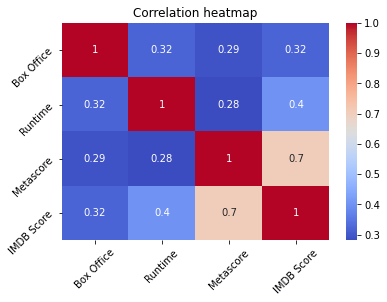

In [8]:
sns.heatmap(meta_df.corr(),annot=True,cmap='coolwarm')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlation heatmap')


In [9]:
bins = [0, 79.9, 84.9, 89.9, 94.9, 99.9, 104.9, 109.9, 114.9, 119.9, 124.9, 129.9, 134.9, 139.9, 144.9, 
       149.9, 154.9, 205]

group_names = ['0-80', '80-85', '85-90', '90-95', '95-100', '100-105', '105-110', '110-115', '115-120', 
              '120-125', '125-130', '130-135', '135-140', '140-145', '145-150', '150-155', '>155']

meta_df['Runtime Group'] = pd.cut(meta_df['Runtime'], bins, labels=group_names, include_lowest= True)
meta_df

,Title,Box Office,Runtime,Metascore,IMDB Score,MPAA Rating,Month Released,Year Released,Runtime Group
0,Star Wars: Episode V - The Empire Strikes Back,292753960,124,82,8.7,PG,Jun,1980,120-125
1,Stir Crazy,101300000,111,56,6.8,R,Dec,1980,110-115
2,Any Which Way You Can,70687344,116,51,6.1,PG,Dec,1980,115-120
3,Private Benjamin,69847348,109,59,6.2,R,Oct,1980,105-110
4,Coal Miner's Daughter,67182787,124,87,7.5,PG,Mar,1980,120-125
...,...,...,...,...,...,...,...,...,...
1667,Let Him Go,9358025,113,63,6.7,R,Nov,2020,110-115
1668,Freaky,9030855,102,67,6.3,R,Nov,2020,100-105
1669,Downhill,8287061,86,49,4.9,R,Feb,2020,85-90
1670,The Hunt,5812500,90,50,6.5,R,Mar,2020,90-95


In [10]:
group_df = meta_df.groupby(['Runtime Group'])
print(group_df['Box Office'].mean())
print(group_df['Box Office'].count())
print(group_df['Box Office'].mean().max())
print(group_df['Box Office'].mean().min())

Runtime Group
0-80       6.619411e+07
80-85      9.121923e+07
85-90      9.424827e+07
90-95      9.208596e+07
95-100     8.594413e+07
100-105    9.107520e+07
105-110    9.157780e+07
110-115    8.590032e+07
115-120    1.134677e+08
120-125    1.249952e+08
125-130    1.280214e+08
130-135    1.299920e+08
135-140    1.575476e+08
140-145    1.990024e+08
145-150    2.119422e+08
150-155    2.111155e+08
>155       2.168230e+08
Name: Box Office, dtype: float64
Runtime Group
0-80         9
80-85       38
85-90       91
90-95      161
95-100     193
100-105    202
105-110    200
110-115    149
115-120    158
120-125    109
125-130     94
130-135     77
135-140     57
140-145     48
145-150     23
150-155     23
>155        40
Name: Box Office, dtype: int64
216823028.525
66194108.44444445


/Users/novakradovic/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


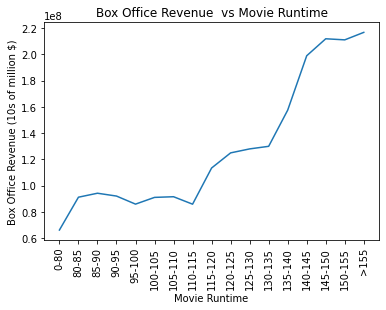

In [11]:
plt.plot(group_df['Box Office'].mean())
plt.xticks(np.arange(0, 17, step=1),rotation = 90)
plt.xlabel('Movie Runtime')
plt.ylabel('Box Office Revenue (10s of million $)')
plt.title('Box Office Revenue  vs Movie Runtime')

plt.show()

In [12]:
bins_meta = [0,29.9,39.9, 49.9, 59.9, 69.9, 79.9, 89.9, 100]
group_meta = ['0-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

meta_df['Metascore Group'] = pd.cut(meta_df['Metascore'], bins_meta, labels=group_meta, include_lowest= True)


In [13]:
group_m_df = meta_df.groupby(['Metascore Group'])
print(group_m_df['Box Office'].mean())
print(group_m_df['Box Office'].count())
print(group_m_df['Box Office'].mean().max())
print(group_m_df['Box Office'].mean().min())

Metascore Group
0-30      6.415878e+07
30-40     7.740368e+07
40-50     9.123149e+07
50-60     1.100742e+08
60-70     1.106208e+08
70-80     1.380575e+08
80-90     1.834234e+08
90-100    2.235829e+08
Name: Box Office, dtype: float64
Metascore Group
0-30       72
30-40     180
40-50     336
50-60     369
60-70     386
70-80     212
80-90      96
90-100     21
Name: Box Office, dtype: int64
223582949.52380952
64158781.38888889


/Users/novakradovic/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


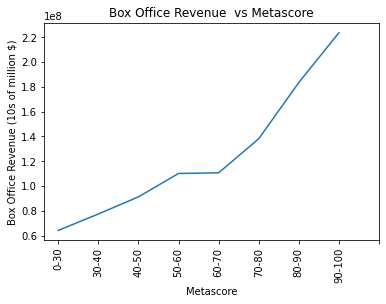

In [14]:
plt.plot(group_m_df['Box Office'].mean())
plt.xticks(np.arange(0, 9, step=1),rotation = 90)
plt.xlabel('Metascore')
plt.ylabel('Box Office Revenue (10s of million $)')
plt.title('Box Office Revenue  vs Metascore')
plt.show()


In [15]:
bins_i = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ]
group_i = ['0-1','1-2','2-3','3-4', '4-5','5-6', '6-7', '7-8', '8-9', '9-10']

meta_df['IMDB Group'] = pd.cut(meta_df['IMDB Score'], bins_i, labels=group_i, include_lowest= True)


In [16]:
group_i_df = meta_df.groupby(['IMDB Group'])
print(group_i_df['Box Office'].mean())
print(group_i_df['Box Office'].count())
print(group_i_df['Box Office'].mean().max())
print(group_i_df['Box Office'].mean().min())

IMDB Group
0-1              NaN
1-2     7.301391e+07
2-3     6.528178e+07
3-4     6.775780e+07
4-5     7.932948e+07
5-6     7.561536e+07
6-7     1.019690e+08
7-8     1.440455e+08
8-9     2.132707e+08
9-10             NaN
Name: Box Office, dtype: float64
IMDB Group
0-1       0
1-2       1
2-3       1
3-4      11
4-5      65
5-6     335
6-7     789
7-8     404
8-9      66
9-10      0
Name: Box Office, dtype: int64
213270703.27272728
65281781.0


/Users/novakradovic/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_base.py:405: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


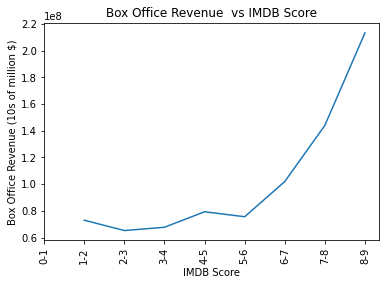

In [17]:
plt.plot(group_i_df['Box Office'].mean())
plt.xticks(np.arange(0, 9, step=1),rotation = 90)
plt.xlabel('IMDB Score')
plt.ylabel('Box Office Revenue (10s of million $)')
plt.title('Box Office Revenue  vs IMDB Score')
plt.show()


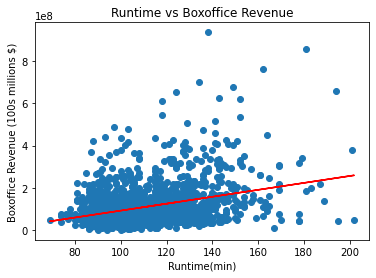

The P-Value is: 1.339693196339458e-41
The R-Value is: 0.32184147849556755


In [18]:
x_run = meta_df['Runtime']
y_run = meta_df['Box Office']
plt.scatter(x_run, y_run)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_run, y_run)
regress_values = x_run * slope + intercept
plt.plot(x_run,regress_values,"r-")
plt.title('Runtime vs Boxoffice Revenue')
plt.xlabel('Runtime(min)')
plt.ylabel('Boxoffice Revenue (100s millions $)')
plt.show()
print(f'The P-Value is: {pvalue}')
print(f'The R-Value is: {rvalue}')



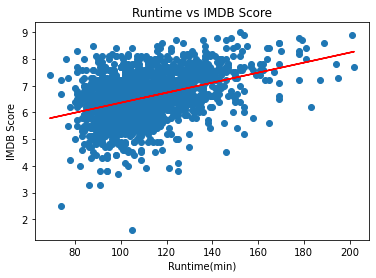

The P-Value is: 1.2604924853816772e-65
The R-Value is: 0.4010366068137426


In [19]:
x_run = meta_df['Runtime']
y_run = meta_df['IMDB Score']
plt.scatter(x_run, y_run)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_run, y_run)
regress_values = x_run * slope + intercept
plt.plot(x_run,regress_values,"r-")
plt.title('Runtime vs IMDB Score')
plt.xlabel('Runtime(min)')
plt.ylabel('IMDB Score')
plt.show()
print(f'The P-Value is: {pvalue}')
print(f'The R-Value is: {rvalue}')


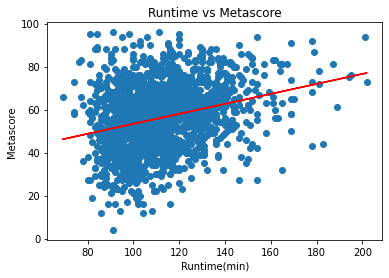

The P-Value is: 1.2574271936292692e-31
The R-Value is: 0.2806024314432422


In [20]:
x_run = meta_df['Runtime']
y_run = meta_df['Metascore']
plt.scatter(x_run, y_run)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_run, y_run)
regress_values = x_run * slope + intercept
plt.plot(x_run,regress_values,"r-")
plt.title('Runtime vs Metascore')
plt.xlabel('Runtime(min)')
plt.ylabel('Metascore')
plt.show()
print(f'The P-Value is: {pvalue}')
print(f'The R-Value is: {rvalue}')


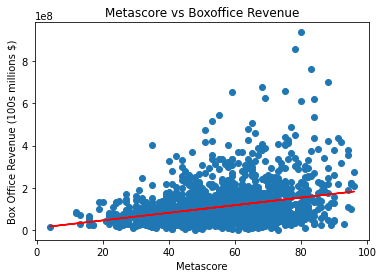

The P-Value is: 1.9422446580595905e-34
The R-Value is: 0.29292560919083566


In [21]:
x = meta_df['Metascore']
y_1 = meta_df['Box Office']
plt.scatter(x, y_1)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y_1)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
plt.title('Metascore vs Boxoffice Revenue')
plt.xlabel('Metascore')
plt.ylabel('Box Office Revenue (100s millions $)')
plt.show()
print(f'The P-Value is: {pvalue}')
print(f'The R-Value is: {rvalue}')

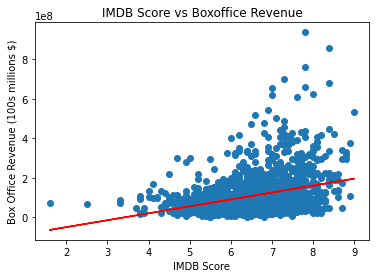

The P-Value is: 1.4775223012146306e-41
The R-Value is: 0.3216789370703879


In [22]:
x = meta_df['IMDB Score']
y_1 = meta_df['Box Office']
plt.scatter(x, y_1)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y_1)
regress_values = x * slope + intercept
plt.plot(x,regress_values,"r-")
plt.title('IMDB Score vs Boxoffice Revenue')
plt.xlabel('IMDB Score')
plt.ylabel('Box Office Revenue (100s millions $)')
plt.show()
print(f'The P-Value is: {pvalue}')
print(f'The R-Value is: {rvalue}')

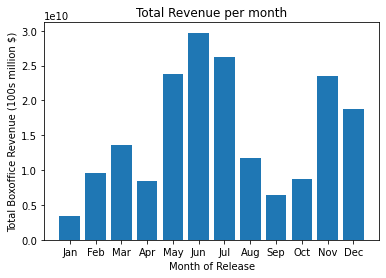

In [23]:
months = meta_df.groupby(['Month Released']).sum().reset_index(inplace=False)
months = months.reindex([4,3,7,0,8,6,5,1,11,10,9,2])
plt.bar(months['Month Released'], months['Box Office'])
plt.title('Total Revenue per month')
plt.xlabel('Month of Release')
plt.ylabel('Total Boxoffice Revenue (100s million $)')
plt.show()


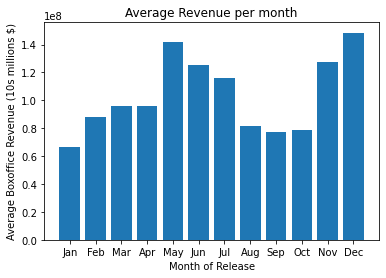

In [24]:
months = meta_df.groupby(['Month Released']).mean().reset_index(inplace=False)
months = months.reindex([4,3,7,0,8,6,5,1,11,10,9,2])
plt.bar(months['Month Released'], months['Box Office'])
plt.title('Average Revenue per month')
plt.xlabel('Month of Release')
plt.ylabel('Average Boxoffice Revenue (10s millions $)')
plt.show()


In [25]:
months = meta_df.groupby(['Month Released']).count().reset_index(inplace=False)
months

,Month Released,Title,Box Office,Runtime,Metascore,IMDB Score,MPAA Rating,Year Released,Runtime Group,Metascore Group,IMDB Group
0,Apr,88,88,88,88,88,88,88,88,88,88
1,Aug,145,145,145,145,145,145,145,145,145,145
2,Dec,126,126,126,126,126,126,126,126,126,126
3,Feb,109,109,109,109,109,109,109,109,109,109
4,Jan,51,51,51,51,51,51,51,51,51,51
5,Jul,227,227,227,227,227,227,227,227,227,227
6,Jun,237,237,237,237,237,237,237,237,237,237
7,Mar,142,142,142,142,142,142,142,142,142,142
8,May,167,167,167,167,167,167,167,167,167,167
9,Nov,185,185,185,185,185,185,185,185,185,185


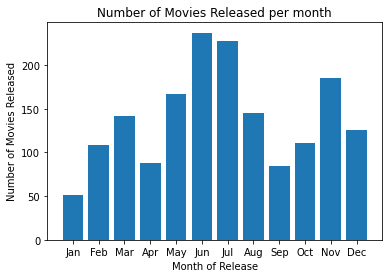

In [27]:
months = meta_df.groupby(['Month Released']).count().reset_index(inplace=False)
months = months.reindex([4,3,7,0,8,6,5,1,11,10,9,2])
plt.bar(months['Month Released'], months['Box Office'])
plt.title('Number of Movies Released per month')
plt.xlabel('Month of Release')
plt.ylabel('Number of Movies Released')
plt.show()
